<a href="https://colab.research.google.com/github/thegrouch4413/Predictive-Analysis/blob/main/Final_Project_Predicting_NBA_Win_Shares_for_22_23_Season.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#Upload data from BasketballReference.com

Upload player stats and advanced stats

##Upload Stats for 2021-2022

In [2]:
# NBA season we will be analyzing
year = 2022

# URL page we will scraping 
url = "https://www.basketball-reference.com/leagues/NBA_2022_per_game.html".format(year)

# this is the HTML from the given URL
html = urlopen(url)

soup = BeautifulSoup(html)

In [3]:
# use findALL() to get the column headers
soup.findAll('tr', limit=2)

# use getText()to extract the text we need into a list
headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]

# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
headers = headers[1:]
headers

['Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [4]:
# avoid the first header row
rows = soup.findAll('tr')[1:]

player_stats_21_22 = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

In [5]:
stats_21_22 = pd.DataFrame(player_stats_21_22, columns = headers)

stats_21_22.head(15)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,.439,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,.547,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,.557,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,.402,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,.550,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
5,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,.372,...,.743,0.6,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6
6,Nickeil Alexander-Walker,SG,23,NOP,50,19,26.3,4.7,12.6,.375,...,.722,0.7,2.6,3.3,2.8,0.8,0.4,1.7,1.8,12.8
7,Nickeil Alexander-Walker,SG,23,UTA,15,2,9.9,1.1,3.2,.333,...,.917,0.1,1.5,1.5,1.1,0.3,0.3,0.5,1.0,3.5
8,Grayson Allen,SG,26,MIL,66,61,27.3,3.9,8.6,.448,...,.865,0.5,2.9,3.4,1.5,0.7,0.3,0.7,1.5,11.1
9,Jarrett Allen,C,23,CLE,56,56,32.3,6.6,9.7,.677,...,.708,3.4,7.3,10.8,1.6,0.8,1.3,1.7,1.7,16.1


##Upload Stats for 2020-2021

In [6]:
year = 2021

url = "https://www.basketball-reference.com/leagues/NBA_2021_per_game.html".format(year)

html = urlopen(url)

soup = BeautifulSoup(html)

In [7]:
soup.findAll('tr', limit=2)

headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]

headers = headers[1:]
headers

['Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [8]:
rows = soup.findAll('tr')[1:]

player_stats_20_21 = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

In [9]:
stats_20_21 = pd.DataFrame(player_stats_20_21, columns = headers)

stats_20_21.head(15)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,.544,...,.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,.125,...,,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,.614,...,.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,.570,...,.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,.473,...,.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
5,LaMarcus Aldridge,C,35,SAS,21,18,25.9,5.5,11.8,.464,...,.838,0.8,3.7,4.5,1.7,0.4,0.9,1.0,1.7,13.7
6,LaMarcus Aldridge,C,35,BRK,5,5,26.0,5.0,9.6,.521,...,1.000,0.4,4.4,4.8,2.6,0.6,2.2,1.4,2.2,12.8
7,Ty-Shon Alexander,SG,22,PHO,15,0,3.1,0.2,0.8,.250,...,.500,0.1,0.5,0.7,0.4,0.0,0.1,0.2,0.1,0.6
8,Nickeil Alexander-Walker,SG,22,NOP,46,13,21.9,4.2,10.0,.419,...,.727,0.3,2.8,3.1,2.2,1.0,0.5,1.5,1.9,11.0
9,Grayson Allen,SG,25,MEM,50,38,25.2,3.5,8.3,.418,...,.868,0.4,2.8,3.2,2.2,0.9,0.2,1.0,1.4,10.6


##Upload Stats for 2019-2020

In [10]:
year = 2020

url = "https://www.basketball-reference.com/leagues/NBA_2020_per_game.html".format(year)

html = urlopen(url)

soup = BeautifulSoup(html)

In [11]:
soup.findAll('tr', limit=2)

headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]

headers = headers[1:]
headers

['Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [12]:
rows = soup.findAll('tr')[1:]

player_stats_19_20 = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

In [13]:
stats_19_20 = pd.DataFrame(player_stats_19_20, columns = headers)

stats_19_20.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,.592,...,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,.557,...,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,.493,...,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,.500,...,,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,.368,...,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7


##Upload advanced stats 21-22

In [14]:
year = 2022

url = "https://www.basketball-reference.com/leagues/NBA_2022_advanced.html".format(year)

html = urlopen(url)

soup = BeautifulSoup(html)

In [15]:
soup.findAll('tr', limit=2)

headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]

headers = headers[1:]
headers

['Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 '\xa0',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 '\xa0',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP']

In [16]:
rows = soup.findAll('tr')[1:]

Win_Shares_21_22 = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

In [17]:
WS_21_22 = pd.DataFrame(Win_Shares_21_22, columns = headers)

WS_21_22.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,C,22,TOR,73,1725,12.7,.503,.259,.217,...,,0.4,2.1,2.5,.070,,-2.0,-0.6,-2.6,-0.2
1,Steven Adams,C,28,MEM,76,1999,17.6,.560,.003,.518,...,,3.8,3.0,6.8,.163,,1.0,1.0,2.0,2.0
2,Bam Adebayo,C,24,MIA,56,1825,21.8,.608,.008,.466,...,,3.6,3.5,7.2,.188,,1.7,2.1,3.8,2.7
3,Santi Aldama,PF,21,MEM,32,360,10.2,.452,.364,.242,...,,-0.1,0.4,0.3,.044,,-4.2,-1.5,-5.7,-0.3
4,LaMarcus Aldridge,C,36,BRK,47,1050,19.6,.604,.100,.223,...,,2.1,1.0,3.1,.141,,1.3,-0.6,0.7,0.7


##Upload advanced stats 20-21

In [18]:
year = 2021

url = "https://www.basketball-reference.com/leagues/NBA_2021_advanced.html".format(year)

html = urlopen(url)

soup = BeautifulSoup(html)

In [19]:
soup.findAll('tr', limit=2)

headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]

headers = headers[1:]
headers

['Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 '\xa0',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 '\xa0',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP']

In [20]:
rows = soup.findAll('tr')[1:]

Win_Shares_20_21 = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

In [21]:
WS_20_21 = pd.DataFrame(Win_Shares_20_21, columns = headers)

WS_20_21.head(15)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,61,737,14.2,.550,.004,.482,...,,0.3,1.0,1.3,.085,,-3.6,-0.5,-4.1,-0.4
1,Jaylen Adams,PG,24,MIL,7,18,-6.5,.125,.250,.000,...,,-0.1,0.0,-0.1,-0.252,,-15.1,-4.6,-19.8,-0.1
2,Steven Adams,C,27,NOP,58,1605,15.1,.596,.010,.438,...,,2.3,1.7,4.0,.119,,-0.4,0.1,-0.3,0.7
3,Bam Adebayo,C,23,MIA,64,2143,22.7,.626,.010,.443,...,,5.6,3.2,8.8,.197,,2.9,2.0,4.9,3.7
4,LaMarcus Aldridge,C,35,TOT,26,674,15.7,.556,.270,.159,...,,0.5,0.6,1.1,.080,,-0.2,-0.2,-0.3,0.3
5,LaMarcus Aldridge,C,35,SAS,21,544,15.1,.545,.302,.149,...,,0.3,0.5,0.8,.067,,-0.2,-0.7,-0.9,0.2
6,LaMarcus Aldridge,C,35,BRK,5,130,18.2,.611,.104,.208,...,,0.2,0.2,0.4,.135,,0.1,2.1,2.2,0.1
7,Ty-Shon Alexander,SG,22,PHO,15,47,4.2,.349,.750,.167,...,,-0.1,0.0,0.0,-0.048,,-4.8,-1.7,-6.5,-0.1
8,Nickeil Alexander-Walker,SG,22,NOP,46,1007,12.5,.522,.478,.144,...,,-0.3,1.0,0.7,.035,,-1.4,0.1,-1.3,0.2
9,Grayson Allen,SG,25,MEM,50,1259,12.8,.586,.662,.220,...,,1.5,1.2,2.7,.101,,-0.2,0.1,-0.2,0.6


##Upload advanced stats 19-20

In [22]:
year = 2020

url = "https://www.basketball-reference.com/leagues/NBA_2020_advanced.html".format(year)

html = urlopen(url)

soup = BeautifulSoup(html)

In [23]:
soup.findAll('tr', limit=2)

headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]

headers = headers[1:]
headers

['Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 '\xa0',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 '\xa0',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP']

In [24]:
rows = soup.findAll('tr')[1:]

Win_Shares_19_20 = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

In [25]:
WS_19_20 = pd.DataFrame(Win_Shares_19_20, columns = headers)

WS_19_20.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
0,Steven Adams,C,26,OKC,63,1680,20.5,.604,.006,.421,...,,3.8,2.7,6.5,.185,,1.9,1.1,2.9,2.1
1,Bam Adebayo,PF,22,MIA,72,2417,20.3,.598,.018,.484,...,,4.6,3.9,8.5,.168,,1.4,2.0,3.4,3.3
2,LaMarcus Aldridge,C,34,SAS,53,1754,19.7,.571,.198,.241,...,,3.0,1.4,4.5,.122,,1.8,-0.5,1.4,1.5
3,Kyle Alexander,C,23,MIA,2,13,4.7,.500,.000,.000,...,,0.0,0.0,0.0,-0.003,,-6.4,-3.7,-10.1,0.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,591,8.9,.473,.500,.139,...,,-0.7,0.4,-0.2,-0.020,,-3.2,-1.4,-4.6,-0.4


#EDA

EDA

##Make new dataset for WS as all stats except for WS in Advance Stats are not needed for all seasons

Drop total as only team stats are needed

In [26]:
WS_21_22.drop(WS_21_22.index[WS_21_22['Tm'] == 'TOT'], inplace=True)

Drop null values

In [27]:
WS_21_22 = WS_21_22.dropna()

In [28]:
WS_22 = WS_21_22[['WS']]

In [29]:
WS_22

,WS
0,2.5
1,6.8
2,7.2
3,0.3
4,3.1
...,...
837,1.3
838,10.0
839,2.1
840,1.1


Repeat for 20-21 season

In [30]:
WS_20_21.drop(WS_20_21.index[WS_20_21['Tm'] == 'TOT'], inplace=True)

In [31]:
WS_20_21 = WS_20_21.dropna()

In [32]:
WS_21 = WS_20_21[['WS']]

In [33]:
WS_21

,WS
0,1.3
1,-0.1
2,4.0
3,8.8
5,0.8
...,...
726,1.3
727,5.1
728,7.2
729,3.3


Repeat for 19-20 season

In [34]:
WS_19_20.drop(WS_19_20.index[WS_19_20['Tm'] == 'TOT'], inplace=True)

In [35]:
WS_19_20 = WS_19_20.dropna()

In [36]:
WS_20 = WS_19_20[['WS']]

In [37]:
WS_20

,WS
0,6.5
1,8.5
2,4.5
3,0.0
4,-0.2
...,...
672,5.9
673,3.6
674,0.0
675,0.5


##Clean 2021-2022 DataFrame

Check to see if players names are repeated

In [38]:
stats_21_22[['Player','Tm']].head(15)

,Player,Tm
0,Precious Achiuwa,TOR
1,Steven Adams,MEM
2,Bam Adebayo,MIA
3,Santi Aldama,MEM
4,LaMarcus Aldridge,BRK
5,Nickeil Alexander-Walker,TOT
6,Nickeil Alexander-Walker,NOP
7,Nickeil Alexander-Walker,UTA
8,Grayson Allen,MIL
9,Jarrett Allen,CLE


In [39]:
stats_21_22.duplicated('Player')

0      False
1      False
2      False
3      False
4      False
       ...  
837     True
838    False
839    False
840    False
841    False
Length: 842, dtype: bool

Drop all columns with no values

In [40]:
stats_22 = stats_21_22.dropna()

In [41]:
stats_22

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,.439,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,.547,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,.557,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,.402,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,.550,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,.465,...,.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
838,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,.460,...,.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
839,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,.526,...,.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
840,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,.567,...,.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


Check how many players are duplicated

In [42]:
stats_22[stats_21_22.duplicated('Player')]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
6,Nickeil Alexander-Walker,SG,23,NOP,50,19,26.3,4.7,12.6,.375,...,.722,0.7,2.6,3.3,2.8,0.8,0.4,1.7,1.8,12.8
7,Nickeil Alexander-Walker,SG,23,UTA,15,2,9.9,1.1,3.2,.333,...,.917,0.1,1.5,1.5,1.1,0.3,0.3,0.5,1.0,3.5
12,Justin Anderson,SF,28,CLE,3,0,15.7,1.3,2.7,.500,...,.750,0.0,2.0,2.0,2.0,0.3,0.0,0.7,1.3,4.3
13,Justin Anderson,SF,28,IND,13,6,20.7,2.5,6.7,.368,...,.800,0.3,2.8,3.1,2.1,0.5,0.5,0.5,1.4,6.8
23,D.J. Augustin,PG,34,HOU,34,2,15.0,1.6,4.0,.404,...,.868,0.2,1.0,1.2,2.2,0.3,0.0,1.3,0.5,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,Justise Winslow,SF,25,POR,11,10,26.8,4.3,10.5,.405,...,.560,1.8,4.5,6.3,2.9,1.3,0.6,1.1,1.9,10.7
831,Moses Wright,PF,23,LAC,1,0,1.0,0.0,0.0,,...,,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
832,Moses Wright,PF,23,DAL,3,0,4.3,0.3,1.3,.250,...,1.000,0.3,0.7,1.0,0.3,0.0,0.3,0.0,0.0,1.7
836,Thaddeus Young,PF,33,SAS,26,1,14.2,2.8,4.9,.578,...,.455,1.5,2.0,3.6,2.3,0.9,0.3,1.2,1.5,6.1


Drop TOT (Total) in Tm (Team) column as Total stats are not needed, but stats from different teams are needed

In [43]:
stats_22.drop(stats_22.index[stats_22['Tm'] == 'TOT'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
stats_22

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,.439,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,.547,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,.557,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,.402,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,.550,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,.465,...,.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
838,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,.460,...,.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
839,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,.526,...,.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
840,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,.567,...,.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


Change positions to values

In [45]:
stats_22.Pos[stats_22.Pos == 'PG'] = 1
stats_22.Pos[stats_22.Pos == 'SG'] = 2
stats_22.Pos[stats_22.Pos == 'SF'] = 3
stats_22.Pos[stats_22.Pos == 'PF'] = 4
stats_22.Pos[stats_22.Pos == 'C'] = 5

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [46]:
stats_22

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,5,22,TOR,73,28,23.6,3.6,8.3,.439,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,Steven Adams,5,28,MEM,76,75,26.3,2.8,5.1,.547,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,5,24,MIA,56,56,32.6,7.3,13.0,.557,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,4,21,MEM,32,0,11.3,1.7,4.1,.402,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,5,36,BRK,47,12,22.3,5.4,9.7,.550,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,Thaddeus Young,4,33,TOR,26,0,18.3,2.6,5.5,.465,...,.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
838,Trae Young,1,23,ATL,76,76,34.9,9.4,20.3,.460,...,.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
839,Omer Yurtseven,5,23,MIA,56,12,12.6,2.3,4.4,.526,...,.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
840,Cody Zeller,5,29,POR,27,0,13.1,1.9,3.3,.567,...,.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


Add columns for year of stats.

In [47]:
stats_22['Yr']='2022'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Change datatype from Object to float

In [48]:
stats_22['Age'] = stats_22['Age'].astype(float)
stats_22['Pos'] = stats_22['Pos'].astype(float)
stats_22['G'] = stats_22['G'].astype(float)
stats_22['GS'] = stats_22['GS'].astype(float)
stats_22['MP'] = stats_22['MP'].astype(float)
stats_22['FG'] = stats_22['FG'].astype(float)
stats_22['FGA'] = stats_22['FGA'].astype(float)
stats_22['3P'] = stats_22['3P'].astype(float)
stats_22['3PA'] = stats_22['3PA'].astype(float)
stats_22['2P'] = stats_22['2P'].astype(float)
stats_22['2PA'] = stats_22['2PA'].astype(float)
stats_22['FT'] = stats_22['FT'].astype(float)
stats_22['FTA'] = stats_22['FTA'].astype(float)
stats_22['ORB'] = stats_22['ORB'].astype(float)
stats_22['DRB'] = stats_22['DRB'].astype(float)
stats_22['TRB'] = stats_22['TRB'].astype(float)
stats_22['AST'] = stats_22['AST'].astype(float)
stats_22['STL'] = stats_22['STL'].astype(float)
stats_22['BLK'] = stats_22['BLK'].astype(float)
stats_22['TOV'] = stats_22['TOV'].astype(float)
stats_22['PF'] = stats_22['PF'].astype(float)
stats_22['PTS'] = stats_22['PTS'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [49]:
stats_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 841
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  715 non-null    object 
 1   Pos     715 non-null    float64
 2   Age     715 non-null    float64
 3   Tm      715 non-null    object 
 4   G       715 non-null    float64
 5   GS      715 non-null    float64
 6   MP      715 non-null    float64
 7   FG      715 non-null    float64
 8   FGA     715 non-null    float64
 9   FG%     715 non-null    object 
 10  3P      715 non-null    float64
 11  3PA     715 non-null    float64
 12  3P%     715 non-null    object 
 13  2P      715 non-null    float64
 14  2PA     715 non-null    float64
 15  2P%     715 non-null    object 
 16  eFG%    715 non-null    object 
 17  FT      715 non-null    float64
 18  FTA     715 non-null    float64
 19  FT%     715 non-null    object 
 20  ORB     715 non-null    float64
 21  DRB     715 non-null    float64
 22  TR

##Repeat for 2020-2021 DataFrame 

In [50]:
stats_21 = stats_20_21.dropna()

In [51]:
stats_21.drop(stats_21.index[stats_21['Tm'] == 'TOT'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
stats_21['Yr']='2021'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
stats_21

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Yr
0,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,.544,...,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,2021
1,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,.125,...,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3,2021
2,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,.614,...,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6,2021
3,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,.570,...,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,2021
5,LaMarcus Aldridge,C,35,SAS,21,18,25.9,5.5,11.8,.464,...,0.8,3.7,4.5,1.7,0.4,0.9,1.0,1.7,13.7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,.462,...,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,2021
727,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,.559,...,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021
728,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,.438,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
729,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,.559,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


In [54]:
stats_21.Pos[stats_21.Pos == 'PG'] = 1
stats_21.Pos[stats_21.Pos == 'SG'] = 2
stats_21.Pos[stats_21.Pos == 'SF'] = 3
stats_21.Pos[stats_21.Pos == 'PF'] = 4
stats_21.Pos[stats_21.Pos == 'C'] = 5

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [55]:
stats_21

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Yr
0,Precious Achiuwa,4,21,MIA,61,4,12.1,2.0,3.7,.544,...,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,2021
1,Jaylen Adams,1,24,MIL,7,0,2.6,0.1,1.1,.125,...,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3,2021
2,Steven Adams,5,27,NOP,58,58,27.7,3.3,5.3,.614,...,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6,2021
3,Bam Adebayo,5,23,MIA,64,64,33.5,7.1,12.5,.570,...,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,2021
5,LaMarcus Aldridge,5,35,SAS,21,18,25.9,5.5,11.8,.464,...,0.8,3.7,4.5,1.7,0.4,0.9,1.0,1.7,13.7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,Delon Wright,1,28,SAC,27,8,25.8,3.9,8.3,.462,...,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,2021
727,Thaddeus Young,4,32,CHI,68,23,24.3,5.4,9.7,.559,...,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021
728,Trae Young,1,22,ATL,63,63,33.7,7.7,17.7,.438,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
729,Cody Zeller,5,28,CHO,48,21,20.9,3.8,6.8,.559,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


In [56]:
stats_21['Age'] = stats_21['Age'].astype(float)
stats_21['Pos'] = stats_21['Pos'].astype(float)
stats_21['G'] = stats_21['G'].astype(float)
stats_21['GS'] = stats_21['GS'].astype(float)
stats_21['MP'] = stats_21['MP'].astype(float)
stats_21['FG'] = stats_21['FG'].astype(float)
stats_21['FGA'] = stats_21['FGA'].astype(float)
stats_21['3P'] = stats_21['3P'].astype(float)
stats_21['3PA'] = stats_21['3PA'].astype(float)
stats_21['2P'] = stats_21['2P'].astype(float)
stats_21['2PA'] = stats_21['2PA'].astype(float)
stats_21['FT'] = stats_21['FT'].astype(float)
stats_21['FTA'] = stats_21['FTA'].astype(float)
stats_21['ORB'] = stats_21['ORB'].astype(float)
stats_21['DRB'] = stats_21['DRB'].astype(float)
stats_21['TRB'] = stats_21['TRB'].astype(float)
stats_21['AST'] = stats_21['AST'].astype(float)
stats_21['STL'] = stats_21['STL'].astype(float)
stats_21['BLK'] = stats_21['BLK'].astype(float)
stats_21['TOV'] = stats_21['TOV'].astype(float)
stats_21['PF'] = stats_21['PF'].astype(float)
stats_21['PTS'] = stats_21['PTS'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [57]:
stats_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 730
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  626 non-null    object 
 1   Pos     626 non-null    float64
 2   Age     626 non-null    float64
 3   Tm      626 non-null    object 
 4   G       626 non-null    float64
 5   GS      626 non-null    float64
 6   MP      626 non-null    float64
 7   FG      626 non-null    float64
 8   FGA     626 non-null    float64
 9   FG%     626 non-null    object 
 10  3P      626 non-null    float64
 11  3PA     626 non-null    float64
 12  3P%     626 non-null    object 
 13  2P      626 non-null    float64
 14  2PA     626 non-null    float64
 15  2P%     626 non-null    object 
 16  eFG%    626 non-null    object 
 17  FT      626 non-null    float64
 18  FTA     626 non-null    float64
 19  FT%     626 non-null    object 
 20  ORB     626 non-null    float64
 21  DRB     626 non-null    float64
 22  TR

##Repeat for 2019-2020 DataFrame

In [58]:
stats_20 = stats_19_20.dropna()

In [59]:
stats_20.drop(stats_20.index[stats_20['Tm'] == 'TOT'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:
stats_20['Yr']='2020'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
stats_20

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Yr
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,.592,...,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,2020
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,.557,...,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,2020
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,.493,...,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,2020
3,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,.500,...,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,2020
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,.368,...,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,.437,...,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,2020
673,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,.524,...,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,2020
674,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,.250,...,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2020
675,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,.569,...,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4,2020


In [62]:
stats_20.Pos[stats_20.Pos == 'PG'] = 1
stats_20.Pos[stats_20.Pos == 'SG'] = 2
stats_20.Pos[stats_20.Pos == 'SF'] = 3
stats_20.Pos[stats_20.Pos == 'PF'] = 4
stats_20.Pos[stats_20.Pos == 'C'] = 5

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [63]:
stats_20['Age'] = stats_20['Age'].astype(float)
stats_20['Pos'] = stats_20['Pos'].astype(float)
stats_20['G'] = stats_20['G'].astype(float)
stats_20['GS'] = stats_20['GS'].astype(float)
stats_20['MP'] = stats_20['MP'].astype(float)
stats_20['FG'] = stats_20['FG'].astype(float)
stats_20['FGA'] = stats_20['FGA'].astype(float)
stats_20['3P'] = stats_20['3P'].astype(float)
stats_20['3PA'] = stats_20['3PA'].astype(float)
stats_20['2P'] = stats_20['2P'].astype(float)
stats_20['2PA'] = stats_20['2PA'].astype(float)
stats_20['FT'] = stats_20['FT'].astype(float)
stats_20['FTA'] = stats_20['FTA'].astype(float)
stats_20['ORB'] = stats_20['ORB'].astype(float)
stats_20['DRB'] = stats_20['DRB'].astype(float)
stats_20['TRB'] = stats_20['TRB'].astype(float)
stats_20['AST'] = stats_20['AST'].astype(float)
stats_20['STL'] = stats_20['STL'].astype(float)
stats_20['BLK'] = stats_20['BLK'].astype(float)
stats_20['TOV'] = stats_20['TOV'].astype(float)
stats_20['PF'] = stats_20['PF'].astype(float)
stats_20['PTS'] = stats_20['PTS'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [64]:
stats_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 0 to 676
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  591 non-null    object 
 1   Pos     591 non-null    float64
 2   Age     591 non-null    float64
 3   Tm      591 non-null    object 
 4   G       591 non-null    float64
 5   GS      591 non-null    float64
 6   MP      591 non-null    float64
 7   FG      591 non-null    float64
 8   FGA     591 non-null    float64
 9   FG%     591 non-null    object 
 10  3P      591 non-null    float64
 11  3PA     591 non-null    float64
 12  3P%     591 non-null    object 
 13  2P      591 non-null    float64
 14  2PA     591 non-null    float64
 15  2P%     591 non-null    object 
 16  eFG%    591 non-null    object 
 17  FT      591 non-null    float64
 18  FTA     591 non-null    float64
 19  FT%     591 non-null    object 
 20  ORB     591 non-null    float64
 21  DRB     591 non-null    float64
 22  TR

##Add WS to Player Stats

Add WS to player stats for 21-22 season

In [65]:
complete_stats_22 = pd.concat([stats_22, WS_22], axis=1)

In [66]:
complete_stats_22

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Yr,WS
0,Precious Achiuwa,5.0,22.0,TOR,73.0,28.0,23.6,3.6,8.3,.439,...,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,2022,2.5
1,Steven Adams,5.0,28.0,MEM,76.0,75.0,26.3,2.8,5.1,.547,...,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,2022,6.8
2,Bam Adebayo,5.0,24.0,MIA,56.0,56.0,32.6,7.3,13.0,.557,...,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,2022,7.2
3,Santi Aldama,4.0,21.0,MEM,32.0,0.0,11.3,1.7,4.1,.402,...,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,2022,0.3
4,LaMarcus Aldridge,5.0,36.0,BRK,47.0,12.0,22.3,5.4,9.7,.550,...,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,2022,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,Thaddeus Young,4.0,33.0,TOR,26.0,0.0,18.3,2.6,5.5,.465,...,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2022,1.3
838,Trae Young,1.0,23.0,ATL,76.0,76.0,34.9,9.4,20.3,.460,...,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022,10.0
839,Omer Yurtseven,5.0,23.0,MIA,56.0,12.0,12.6,2.3,4.4,.526,...,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022,2.1
840,Cody Zeller,5.0,29.0,POR,27.0,0.0,13.1,1.9,3.3,.567,...,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022,1.1


Add WS to player stats for 20-21 season

In [67]:
complete_stats_21 = pd.concat([stats_21, WS_21], axis=1)

In [68]:
complete_stats_21.head(15)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Yr,WS
0,Precious Achiuwa,4.0,21.0,MIA,61.0,4.0,12.1,2.0,3.7,.544,...,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,2021,1.3
1,Jaylen Adams,1.0,24.0,MIL,7.0,0.0,2.6,0.1,1.1,.125,...,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3,2021,-0.1
2,Steven Adams,5.0,27.0,NOP,58.0,58.0,27.7,3.3,5.3,.614,...,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6,2021,4.0
3,Bam Adebayo,5.0,23.0,MIA,64.0,64.0,33.5,7.1,12.5,.570,...,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,2021,8.8
5,LaMarcus Aldridge,5.0,35.0,SAS,21.0,18.0,25.9,5.5,11.8,.464,...,3.7,4.5,1.7,0.4,0.9,1.0,1.7,13.7,2021,0.8
6,LaMarcus Aldridge,5.0,35.0,BRK,5.0,5.0,26.0,5.0,9.6,.521,...,4.4,4.8,2.6,0.6,2.2,1.4,2.2,12.8,2021,0.4
7,Ty-Shon Alexander,2.0,22.0,PHO,15.0,0.0,3.1,0.2,0.8,.250,...,0.5,0.7,0.4,0.0,0.1,0.2,0.1,0.6,2021,0.0
8,Nickeil Alexander-Walker,2.0,22.0,NOP,46.0,13.0,21.9,4.2,10.0,.419,...,2.8,3.1,2.2,1.0,0.5,1.5,1.9,11.0,2021,0.7
9,Grayson Allen,2.0,25.0,MEM,50.0,38.0,25.2,3.5,8.3,.418,...,2.8,3.2,2.2,0.9,0.2,1.0,1.4,10.6,2021,2.7
11,Jarrett Allen,5.0,22.0,BRK,12.0,5.0,26.7,3.7,5.4,.677,...,7.3,10.4,1.7,0.6,1.6,1.8,1.8,11.2,2021,1.4


Add WS to player stats for 19-20 season

In [69]:
complete_stats_20 = pd.concat([stats_20, WS_20], axis=1)

In [70]:
complete_stats_20.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Yr,WS
0,Steven Adams,5.0,26.0,OKC,63.0,63.0,26.7,4.5,7.6,.592,...,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,2020,6.5
1,Bam Adebayo,4.0,22.0,MIA,72.0,72.0,33.6,6.1,11.0,.557,...,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,2020,8.5
2,LaMarcus Aldridge,5.0,34.0,SAS,53.0,53.0,33.1,7.4,15.0,.493,...,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,2020,4.5
3,Kyle Alexander,5.0,23.0,MIA,2.0,0.0,6.5,0.5,1.0,.500,...,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,2020,0.0
4,Nickeil Alexander-Walker,2.0,21.0,NOP,47.0,1.0,12.6,2.1,5.7,.368,...,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,2020,-0.2


#Visualization

##Describe Data

In [71]:
complete_stats_20.describe()

,Pos,Age,G,GS,MP,FG,FGA,3P,3PA,2P,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,...,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000
mean,3.072758,25.681895,37.890017,17.918782,19.297124,3.137563,6.931134,0.941286,2.698308,2.198308,...,1.777327,0.822843,2.765144,3.585787,1.875465,0.620981,0.397970,1.108799,1.742640,8.564975
std,1.398469,4.073102,23.306864,23.403828,9.208068,2.258786,4.731701,0.861407,2.215094,1.809766,...,1.700387,0.737175,1.863850,2.456413,1.733799,0.409629,0.415173,0.819295,0.830178,6.307739
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,14.000000,0.000000,12.000000,1.400000,3.400000,0.200000,0.950000,0.900000,...,0.700000,0.300000,1.500000,1.900000,0.700000,0.300000,0.100000,0.500000,1.100000,3.850000
50%,3.000000,25.000000,41.000000,5.000000,18.700000,2.600000,5.600000,0.700000,2.300000,1.700000,...,1.300000,0.600000,2.400000,3.100000,1.400000,0.600000,0.300000,0.900000,1.700000,6.900000
75%,4.000000,28.000000,60.000000,32.000000,27.400000,4.350000,9.500000,1.400000,3.800000,2.900000,...,2.300000,1.100000,3.700000,4.700000,2.300000,0.900000,0.500000,1.400000,2.300000,11.900000
max,5.000000,43.000000,74.000000,73.000000,37.500000,10.900000,22.900000,4.400000,12.400000,9.600000,...,11.800000,4.600000,11.400000,15.800000,10.200000,2.100000,2.900000,4.800000,5.000000,34.300000


In [72]:
complete_stats_21.describe()

,Pos,Age,G,GS,MP,FG,FGA,3P,3PA,2P,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,...,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,2.990415,25.728435,36.827476,17.252396,19.526837,3.201118,7.007668,0.974601,2.746006,2.231629,...,1.740096,0.807827,2.783387,3.590256,1.949361,0.612460,0.415974,1.080511,1.627157,8.715974
std,1.400538,4.096405,21.790911,22.015199,9.367063,2.327811,4.809408,0.895416,2.268940,1.852960,...,1.618356,0.737207,1.835580,2.404792,1.846313,0.400286,0.417268,0.833482,0.776349,6.411899
min,1.000000,19.000000,1.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,18.000000,0.000000,12.100000,1.400000,3.400000,0.200000,0.900000,0.800000,...,0.600000,0.300000,1.500000,1.900000,0.700000,0.300000,0.100000,0.500000,1.100000,4.000000
50%,3.000000,25.000000,36.000000,5.000000,19.500000,2.700000,5.900000,0.750000,2.300000,1.700000,...,1.300000,0.600000,2.500000,3.200000,1.400000,0.600000,0.300000,0.900000,1.600000,7.200000
75%,4.000000,28.000000,57.750000,30.000000,27.300000,4.400000,9.400000,1.500000,4.275000,3.200000,...,2.200000,1.000000,3.775000,4.800000,2.500000,0.900000,0.600000,1.400000,2.100000,11.975000
max,5.000000,40.000000,72.000000,72.000000,37.600000,11.200000,23.000000,5.300000,12.700000,10.200000,...,10.700000,4.700000,10.100000,14.300000,11.700000,2.100000,3.400000,5.000000,4.000000,32.000000


In [73]:
complete_stats_22.describe()

,Pos,Age,G,GS,MP,FG,FGA,3P,3PA,2P,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,...,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,2.875524,25.939860,36.416783,17.202797,18.406154,2.920140,6.476084,0.881538,2.586573,2.039860,...,1.598042,0.816224,2.544755,3.359441,1.822238,0.588112,0.357902,0.984895,1.569371,7.941678
std,1.365810,4.084955,26.197959,24.316874,9.859876,2.278203,4.765366,0.860197,2.250021,1.804846,...,1.612563,0.757864,1.826834,2.396404,1.854790,0.432712,0.370674,0.832563,0.839934,6.280433
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,11.000000,0.000000,10.350000,1.200000,3.000000,0.100000,0.750000,0.700000,...,0.500000,0.300000,1.300000,1.700000,0.550000,0.300000,0.100000,0.400000,1.000000,3.250000
50%,3.000000,25.000000,36.000000,4.000000,17.900000,2.500000,5.200000,0.700000,2.100000,1.600000,...,1.200000,0.600000,2.300000,3.000000,1.200000,0.500000,0.300000,0.800000,1.600000,6.500000
75%,4.000000,29.000000,62.000000,26.500000,26.300000,4.000000,9.000000,1.400000,4.000000,2.900000,...,2.100000,1.100000,3.400000,4.450000,2.450000,0.900000,0.500000,1.300000,2.200000,10.800000
max,5.000000,41.000000,82.000000,82.000000,43.500000,11.400000,21.800000,4.500000,11.700000,9.500000,...,11.800000,4.600000,11.000000,14.700000,10.800000,2.500000,2.800000,4.800000,5.000000,30.600000


##FGS per Position per year

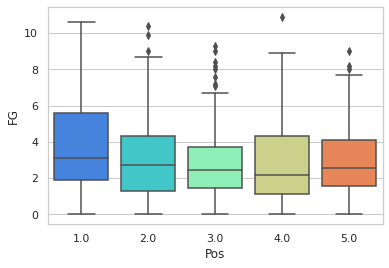

In [74]:
sns.set_style('whitegrid')
sns.boxplot(x='Pos', y='FG',data=stats_20, palette='rainbow')

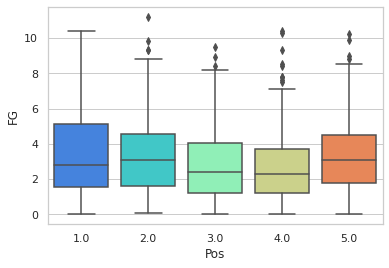

In [75]:
sns.set_style('whitegrid')
sns.boxplot(x='Pos', y='FG',data=stats_21, palette='rainbow')

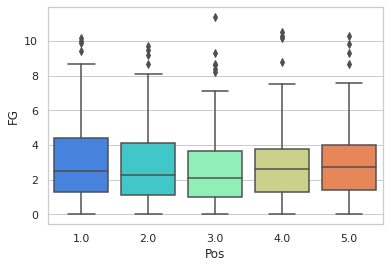

In [76]:
sns.set_style('whitegrid')
sns.boxplot(x='Pos', y='FG',data=stats_22, palette='rainbow')

In all 3 years, PGS seem to make the most fgs and SF the least

In [77]:
FGmax = stats_20['FG'].idxmax()
stats_20.loc[FGmax]['Pos']

4.0

In [78]:
FGmax = stats_21['FG'].idxmax()
stats_21.loc[FGmax]['Pos']

2.0

In [79]:
FGmax = stats_22['FG'].idxmax()
stats_22.loc[FGmax]['Pos']

3.0

In [80]:
FGmin = stats_20['FG'].idxmin()
stats_20.loc[FGmin]['Pos']

5.0

In [81]:
FGmin = stats_21['FG'].idxmin()
stats_21.loc[FGmin]['Pos']

5.0

In [82]:
FGmin = stats_22['FG'].idxmin()
stats_22.loc[FGmin]['Pos']

1.0

Max Fgs vary with positions by year. Max contributers in seasons 19-20 to 21-22 are PFs,SFs, and SGs. Min contributers in seasons 19-20 to 21-22 are Cs twice and PGs.

## PPG per position

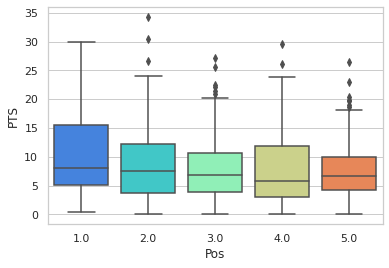

In [83]:
sns.set_style('whitegrid')
sns.boxplot(x='Pos', y='PTS',data=stats_20, palette='rainbow')

In [84]:
PTSmax = stats_20['PTS'].idxmax()
stats_20.loc[FGmax]['Pos']

2.0

In [85]:
PTSmin = stats_20['PTS'].idxmin()
stats_20.loc[FGmin]['Pos']

3.0

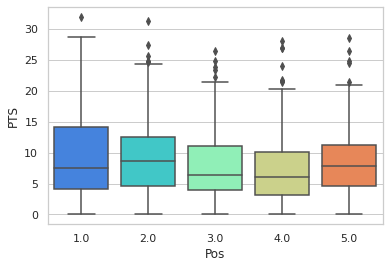

In [86]:
sns.set_style('whitegrid')
sns.boxplot(x='Pos', y='PTS',data=stats_21, palette='rainbow')

In [87]:
PTSmax = stats_21['PTS'].idxmax()
stats_21.loc[FGmax]['Pos']

2.0

In [88]:
PTSmin = stats_21['PTS'].idxmin()
stats_21.loc[FGmin]['Pos']

4.0

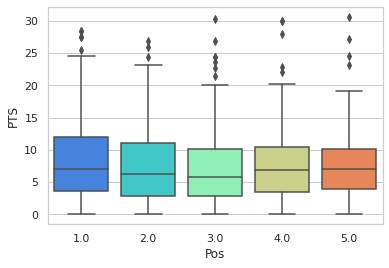

In [89]:
sns.set_style('whitegrid')
sns.boxplot(x='Pos', y='PTS',data=stats_22, palette='rainbow')

In [90]:
PTSmax = stats_22['PTS'].idxmax()
stats_22.loc[FGmax]['Pos']

3.0

In [91]:
PTSmin = stats_22['PTS'].idxmin()
stats_22.loc[FGmin]['Pos']

1.0

It seems like best scorers are wings (SG and SF)

##Pts distribution per year

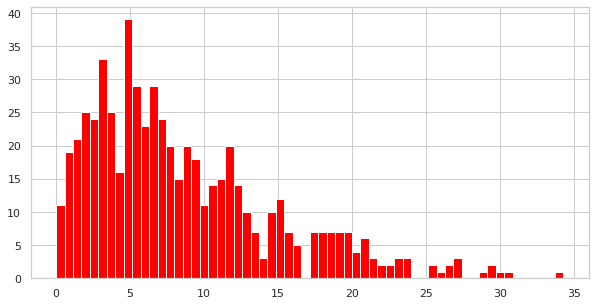

In [92]:
stats_20['PTS'].hist(color='red', bins=60, figsize=(10,5))

In [93]:
stats_20['PTS'].mean()

8.564974619289341

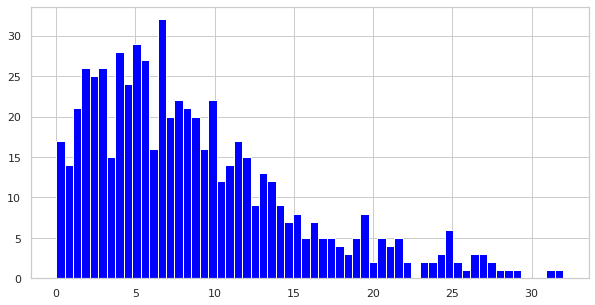

In [94]:
stats_21['PTS'].hist(color='blue', bins=60, figsize=(10,5))

In [95]:
stats_21['PTS'].mean()

8.71597444089457

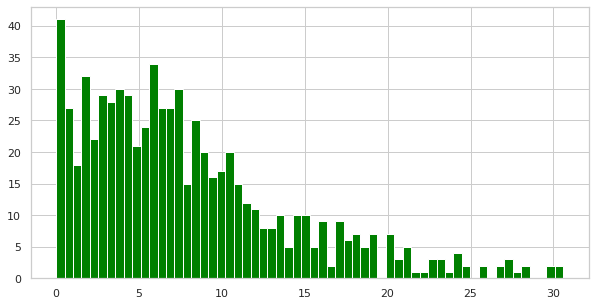

In [96]:
stats_22['PTS'].hist(color='green', bins=60, figsize=(10,5))

In [97]:
stats_22['PTS'].mean()

7.941678321678327

The average for points in all 3 years ranged from 7.94-8.72 points

##3 pointers made by year

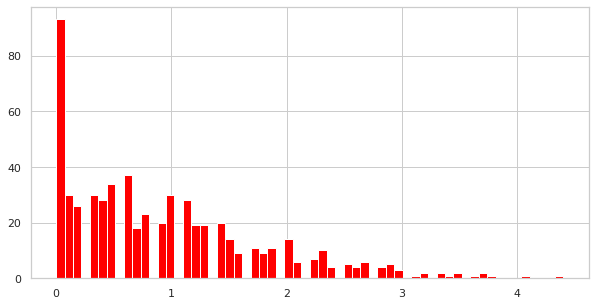

In [98]:
stats_20['3P'].hist(color='red', bins=60, figsize=(10,5))

In [99]:
stats_20['3P'].mean()

0.9412859560067695

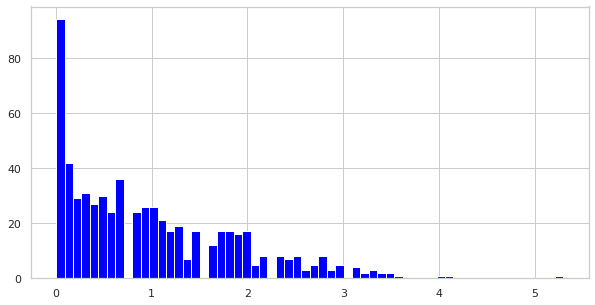

In [100]:
stats_21['3P'].hist(color='blue', bins=60, figsize=(10,5))

In [101]:
stats_21['3P'].mean()

0.9746006389776355

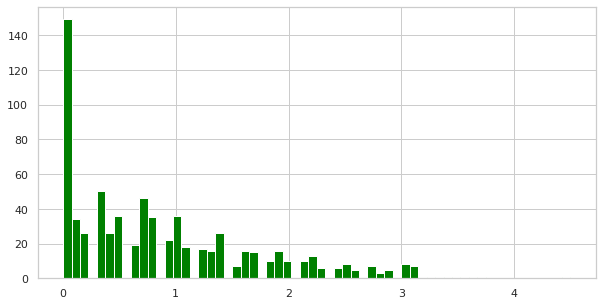

In [102]:
stats_22['3P'].hist(color='green', bins=60, figsize=(10,5))

In [103]:
stats_22['3P'].mean()

0.8815384615384616

3 pointers made were comparable from 19-20 to 20-21 and is slightly lower in 21-22

##Total Rebounds per year

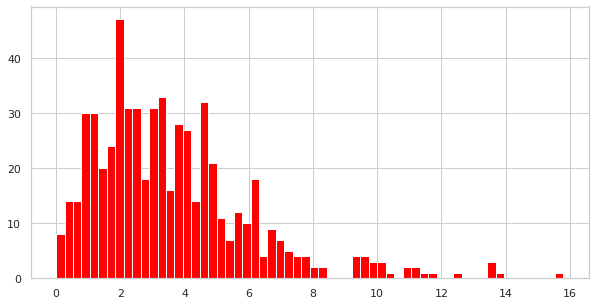

In [104]:
stats_20['TRB'].hist(color='red', bins=60, figsize=(10,5))

In [105]:
stats_20['TRB'].mean()

3.585786802030456

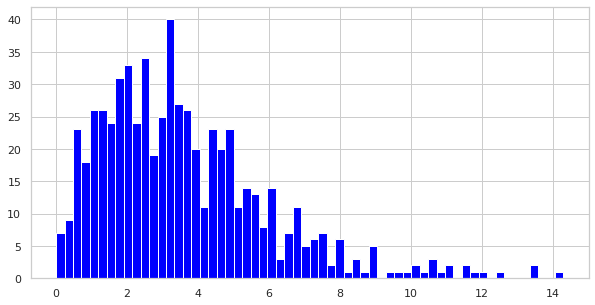

In [106]:
stats_21['TRB'].hist(color='blue', bins=60, figsize=(10,5))

In [107]:
stats_21['TRB'].mean()

3.5902555910543117

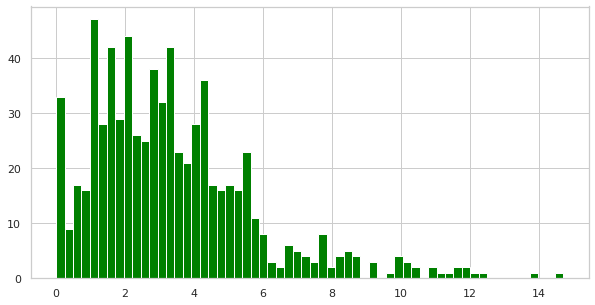

In [108]:
stats_22['TRB'].hist(color='green', bins=60, figsize=(10,5))

In [109]:
stats_22['TRB'].mean()

3.359440559440558

Total rebounds were consistent through the 3 seasons

##Assists per year

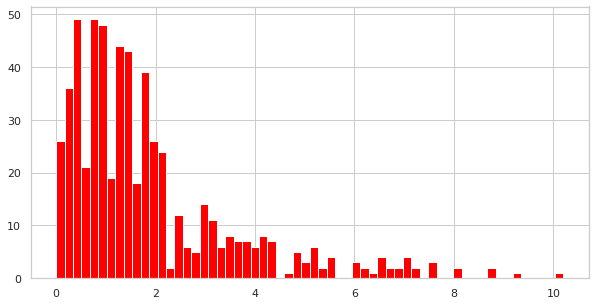

In [110]:
stats_20['AST'].hist(color='red', bins=60, figsize=(10,5))

In [111]:
stats_20['AST'].mean()

1.8754653130287635

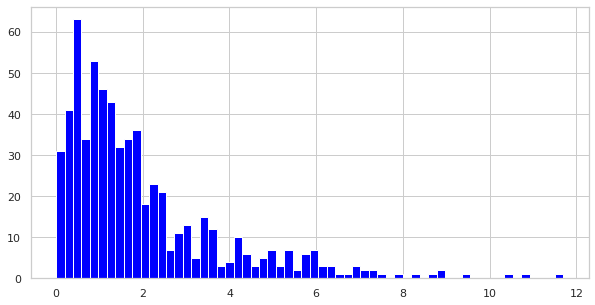

In [112]:
stats_21['AST'].hist(color='blue', bins=60, figsize=(10,5))

In [113]:
stats_21['AST'].mean()

1.9493610223642175

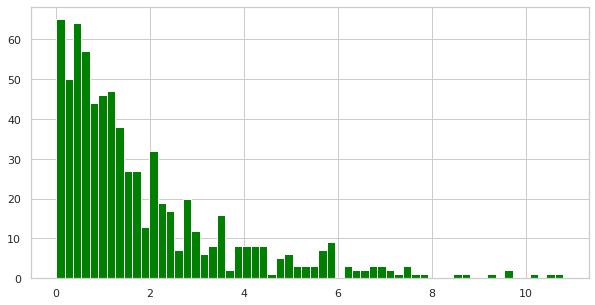

In [114]:
stats_22['AST'].hist(color='green', bins=60, figsize=(10,5))

In [115]:
stats_22['AST'].mean()

1.8222377622377621

Again, assists are consistent through 3 seasons

#Make final Dataframe with ONLY the needed criteria for Win Shares (PTS, FG, 3p, TRB, AST, BLK, STL, G, Yr, MP and WS)

In [119]:
Final_22 = complete_stats_22[['Player', 'Yr', 'PTS', 'FG', '3P', 'TRB', 'AST', 'BLK', 'STL', 'G', 'MP', 'WS']]

In [120]:
Final_22

,Player,Yr,PTS,FG,3P,TRB,AST,BLK,STL,G,MP,WS
0,Precious Achiuwa,2022,9.1,3.6,0.8,6.5,1.1,0.6,0.5,73.0,23.6,2.5
1,Steven Adams,2022,6.9,2.8,0.0,10.0,3.4,0.8,0.9,76.0,26.3,6.8
2,Bam Adebayo,2022,19.1,7.3,0.0,10.1,3.4,0.8,1.4,56.0,32.6,7.2
3,Santi Aldama,2022,4.1,1.7,0.2,2.7,0.7,0.3,0.2,32.0,11.3,0.3
4,LaMarcus Aldridge,2022,12.9,5.4,0.3,5.5,0.9,1.0,0.3,47.0,22.3,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...
837,Thaddeus Young,2022,6.3,2.6,0.7,4.4,1.7,0.4,1.2,26.0,18.3,1.3
838,Trae Young,2022,28.4,9.4,3.1,3.7,9.7,0.1,0.9,76.0,34.9,10.0
839,Omer Yurtseven,2022,5.3,2.3,0.0,5.3,0.9,0.4,0.3,56.0,12.6,2.1
840,Cody Zeller,2022,5.2,1.9,0.0,4.6,0.8,0.2,0.3,27.0,13.1,1.1


In [121]:
Final_21 = complete_stats_21[['Player', 'Yr', 'PTS', 'FG', '3P', 'TRB', 'AST', 'BLK', 'STL', 'G', 'MP', 'WS']]

In [122]:
Final_21

,Player,Yr,PTS,FG,3P,TRB,AST,BLK,STL,G,MP,WS
0,Precious Achiuwa,2021,5.0,2.0,0.0,3.4,0.5,0.5,0.3,61.0,12.1,1.3
1,Jaylen Adams,2021,0.3,0.1,0.0,0.4,0.3,0.0,0.0,7.0,2.6,-0.1
2,Steven Adams,2021,7.6,3.3,0.0,8.9,1.9,0.7,0.9,58.0,27.7,4.0
3,Bam Adebayo,2021,18.7,7.1,0.0,9.0,5.4,1.0,1.2,64.0,33.5,8.8
5,LaMarcus Aldridge,2021,13.7,5.5,1.3,4.5,1.7,0.9,0.4,21.0,25.9,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...
726,Delon Wright,2021,10.0,3.9,1.2,3.9,3.6,0.4,1.6,27.0,25.8,1.3
727,Thaddeus Young,2021,12.1,5.4,0.2,6.2,4.3,0.6,1.1,68.0,24.3,5.1
728,Trae Young,2021,25.3,7.7,2.2,3.9,9.4,0.2,0.8,63.0,33.7,7.2
729,Cody Zeller,2021,9.4,3.8,0.1,6.8,1.8,0.4,0.6,48.0,20.9,3.3


In [123]:
Final_20 = complete_stats_20[['Player', 'Yr', 'PTS', 'FG', '3P', 'TRB', 'AST', 'BLK', 'STL', 'G', 'MP', 'WS']]

In [124]:
Final_20

,Player,Yr,PTS,FG,3P,TRB,AST,BLK,STL,G,MP,WS
0,Steven Adams,2020,10.9,4.5,0.0,9.3,2.3,1.1,0.8,63.0,26.7,6.5
1,Bam Adebayo,2020,15.9,6.1,0.0,10.2,5.1,1.3,1.1,72.0,33.6,8.5
2,LaMarcus Aldridge,2020,18.9,7.4,1.2,7.4,2.4,1.6,0.7,53.0,33.1,4.5
3,Kyle Alexander,2020,1.0,0.5,0.0,1.5,0.0,0.0,0.0,2.0,6.5,0.0
4,Nickeil Alexander-Walker,2020,5.7,2.1,1.0,1.8,1.9,0.2,0.4,47.0,12.6,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
672,Trae Young,2020,29.6,9.1,3.4,4.3,9.3,0.1,1.1,60.0,35.3,5.9
673,Cody Zeller,2020,11.1,4.3,0.3,7.1,1.5,0.4,0.7,58.0,23.1,3.6
674,Tyler Zeller,2020,1.0,0.5,0.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0
675,Ante Žižić,2020,4.4,1.9,0.0,3.0,0.3,0.2,0.3,22.0,10.0,0.5


In [125]:
Final_20_22 = pd.concat([Final_20, Final_21, Final_22])

In [126]:
Final_20_22['PTS'] = Final_20_22['PTS'].astype(float)
Final_20_22['FG'] = Final_20_22['FG'].astype(float)
Final_20_22['3P'] = Final_20_22['3P'].astype(float)
Final_20_22['TRB'] = Final_20_22['TRB'].astype(float)
Final_20_22['AST'] = Final_20_22['AST'].astype(float)
Final_20_22['BLK'] = Final_20_22['BLK'].astype(float)
Final_20_22['STL'] = Final_20_22['STL'].astype(float)
Final_20_22['G'] = Final_20_22['G'].astype(float)
Final_20_22['MP'] = Final_20_22['MP'].astype(float)
Final_20_22['WS'] = Final_20_22['WS'].astype(float)

In [127]:
Final_20_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1932 entries, 0 to 841
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  1932 non-null   object 
 1   Yr      1932 non-null   object 
 2   PTS     1932 non-null   float64
 3   FG      1932 non-null   float64
 4   3P      1932 non-null   float64
 5   TRB     1932 non-null   float64
 6   AST     1932 non-null   float64
 7   BLK     1932 non-null   float64
 8   STL     1932 non-null   float64
 9   G       1932 non-null   float64
 10  MP      1932 non-null   float64
 11  WS      1932 non-null   float64
dtypes: float64(10), object(2)
memory usage: 196.2+ KB


##Determine Correlation to WS

In [128]:
corr_20_22 = Final_20_22.corr()['WS'].reset_index()
corr_20_22 = corr_20_22.sort_values([('WS')], ascending = False)
corr_20_22

,index,WS
9,WS,1.000000
1,FG,0.700589
7,G,0.700453
0,PTS,0.698463
3,TRB,0.662840
8,MP,0.647953
4,AST,0.519581
6,STL,0.484085
5,BLK,0.439770
2,3P,0.398991


Surprisingly 3 pointers dont have a high correlation to Win shares. Although the league has started attempting more 3 pointers through all positions, the stat doesnt correlate to winning. It makes sense as there is a saying in basketball which goes 'You live by the 3, you die by the 3'. So 3 pointers will be dropped. Blocks and Steals are close enough to having a high correclation so they will stay. 

#Implementing Models

We will use Linear Regression, KNN and SVM

##Train Models

In [129]:
train, test = train_test_split(Final_20_22, test_size=0.3)

X_train = train[['PTS', 'FG', 'TRB', 'AST', 'BLK', 'STL', 'G', 'MP']]
y_train = train[['WS']]

X_test = test[['PTS', 'FG', 'TRB', 'AST', 'BLK', 'STL', 'G', 'MP']]
y_test = test[['WS']]

##Linear Regression

In [145]:
linReg = linear_model.LinearRegression()
linReg.fit(X_train, y_train)

linReg.predict(X_test)

WS_pred = linReg.predict(X_test)

In [146]:
'Score: %.3f' % linReg.score(X_train, y_train)

'Score: 0.735'

In [147]:
'Mean squared error: %.3f' % mean_squared_error(y_test, WS_pred)

'Mean squared error: 1.371'

In [148]:
'Mean Absolute error: %.3f' % mean_absolute_error(y_test, WS_pred)

'Mean Absolute error: 0.864'

In [149]:
'Variance score: %.3f' % r2_score(y_test, WS_pred)

'Variance score: 0.718'

##KNN (K Nearest Neighbor)

In [140]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)

WS_knn = knn.predict(X_test)

In [141]:
'Score: %.3f' % knn.score(X_train, y_train)

'Score: 0.850'

In [142]:
'Mean Squared Error: %.3f' % mean_squared_error(y_test, WS_knn)

'Mean Squared Error: 1.157'

In [143]:
'Mean Absolute error: %.3f' % mean_absolute_error(y_test, WS_knn)

'Mean Absolute error: 0.647'

In [144]:
'Variance Score: %.3f' % r2_score(y_test, WS_knn)

'Variance Score: 0.762'

##SVM (Support Vector Machines)

In [139]:
svr = SVR(kernel='rbf', gamma=1e-3, C=150, epsilon=0.2)
svr.fit(X_train, y_train.values.ravel())

WS_svr = svr.predict(X_test)

In [135]:
'Score: %.3f' % svr.score(X_train, y_train)

'Score: 0.846'

In [136]:
'Mean Squared Error: %.3f' % mean_squared_error(y_test, WS_svr)

'Mean Squared Error: 0.913'

In [137]:
'Mean Absolute error: %.3f' % mean_absolute_error(y_test, WS_svr)

'Mean Absolute error: 0.592'

In [138]:
'Variance Score: %.3f' % r2_score(y_test, WS_svr)

'Variance Score: 0.812'

#Conclusion

By using the 5 major statistical categories (points, rebounds, assists, blocks and steals) along with games and minutes played, a good predictive model was created. As shown through the Score, KNN is the best implemented model with SVM not far behind in the score dept. As for MSE,NAE and Variance scores, SVM had a lower margin of error in MAE and MSE while also having a higher variance score. Based on those attributes SVM was the better model. Either way, both SVM and KNN were good predictive models to use. Since next years win shares have not occurred yet, the accuracy of these models should be compared with those of next seasons stats at the end of the year.

#References

https://www.basketball-reference.com/


https://www.geeksforgeeks.org/

https://stackoverflow.com/